In [ ]:
import tensorflow
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model
from keras.layers import *
from keras.layers.merge import *
import keras
from keras.optimizers import Adam
width = 512
height = 512
from skimage.io import imsave

### Load images as arrays into a list

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append([img, filename])
    return images
folder="../data"

In [ ]:
SegmentedOpticDisc = '../SegmentationResults_ML/'
SegmentedOpticDiscMLFull = '../SegmentationResults_ML_FULL/'
if not os.path.exists(SegmentedOpticDisc):
    os.makedirs(SegmentedOpticDisc)
if not os.path.exists(SegmentedOpticDiscMLFull):
    os.makedirs(SegmentedOpticDiscMLFull)

In [ ]:
images = load_images_from_folder(folder)

## Displaying few samples

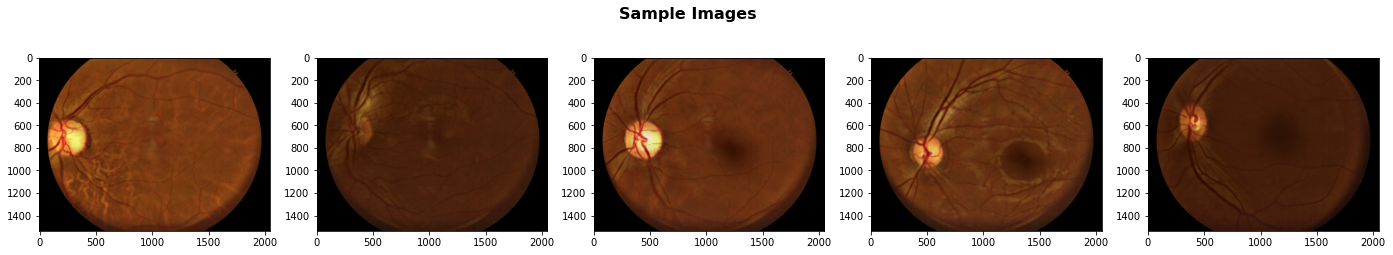

In [ ]:
def showSampleImages(images):
  fig, ax = plt.subplots(1, 5, figsize=(24,4))
  fig.suptitle("Sample Images", fontweight='bold', size=16)
  for i in range(5):
    ax[i].imshow(cv2.cvtColor(images[i][0], cv2.COLOR_BGR2RGB))
  plt.show()
showSampleImages(images)

In [ ]:
cd ../SegmentationResults_ML_FULL

/content/drive/MyDrive/Optic Disc Detection/SegmentationResults_ML_FULL


In [ ]:
from scipy import signal
import cv2
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data


def performODS(image):
#----------------------------PRE-PROCESSING AND SMOOTHING---------------------------------
  a = image[1]
  image = image[0]
  BlueChnl, GreenChnl, RedChnl = cv2.split(image)  #splitting into 3 channels

  Mr = RedChnl.mean()                           #Mean of preprocessed red
  SDr = RedChnl.std()                           #SD of preprocessed red
  Red = RedChnl - Mr - SDr #Preprocessing Red

  #OD Threshold
  ThresoldRed = Red.std()

  filter = signal.gaussian(99, std=6) #Gaussian Window
  filter=filter/sum(filter)

  histr,binsr = np.histogram(Red.ravel(),256,[0,256]) #Histogram of preprocessed red channel

  smooth_hist_r=np.convolve(filter,histr) #Histogram Smoothing Red
    
  
  r,c = Red.shape
  Dd = np.zeros(shape=(r,c))

  for i in range(1,r):
    for j in range(1,c):
      if Red[i,j]>ThresoldRed:
        Dd[i,j]=255
      else:
        Dd[i,j]=0

  ResultImage = Dd
  ResultImage=ResultImage /ResultImage.max()
  ResultImage=255*ResultImage
  ResultImage=ResultImage.astype(np.uint8)
  ResultImage[ResultImage==255]=200
  ResultImage[ResultImage==0]=255   
  ResultImage[ResultImage==200]=0   
  ResultImage[(ResultImage<200) & (ResultImage>0)]=128 
  imsave(SegmentedOpticDisc+a,(ResultImage)) 

  #------------------------DISPLAYING SEGMENTED OPTIC DISK AND CUP--------------------------
  print("\n")
  f, axarr = plt.subplots(1,2, figsize=(16,6))

  f.suptitle("Results of Optic Disc Segmentation for %s" %(a), size=18)
  axarr[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = 'gray', interpolation = 'bicubic');
  axarr[0].set_title("Original", size=16, color='red', fontweight='bold')
  axarr[1].imshow(ResultImage, cmap = 'gray', interpolation = 'bicubic')
  axarr[1].set_title("Optic Disk", color='green', size=16, fontweight='bold')
  plt.show()
  
  # f.savefig('ODS_{0}.jpg'.format(a[0:-4]))

  



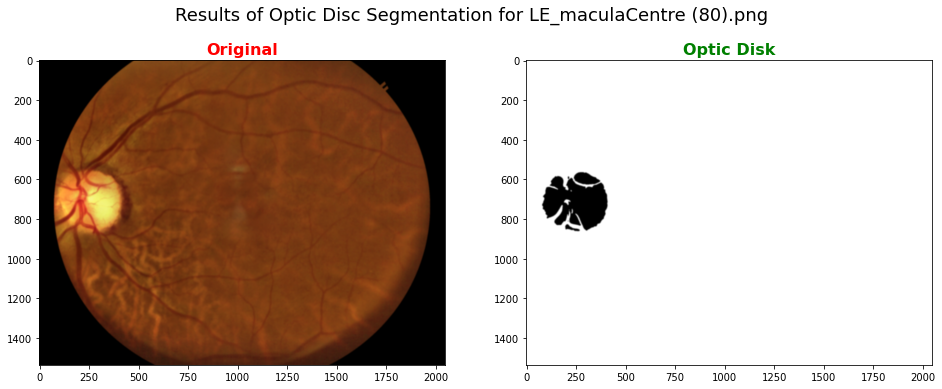

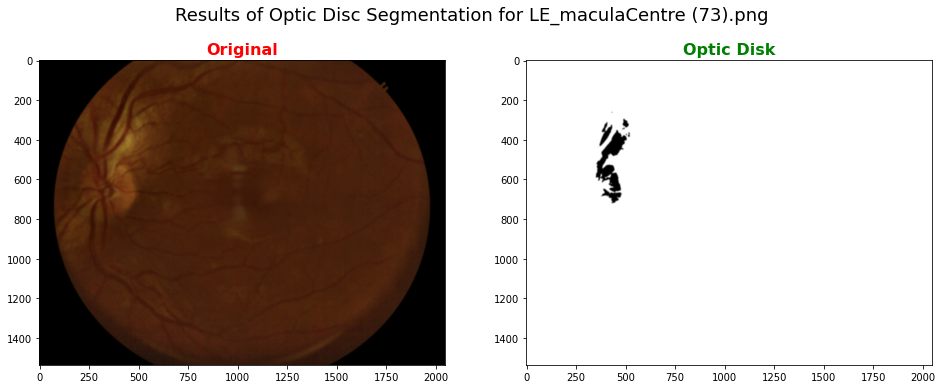

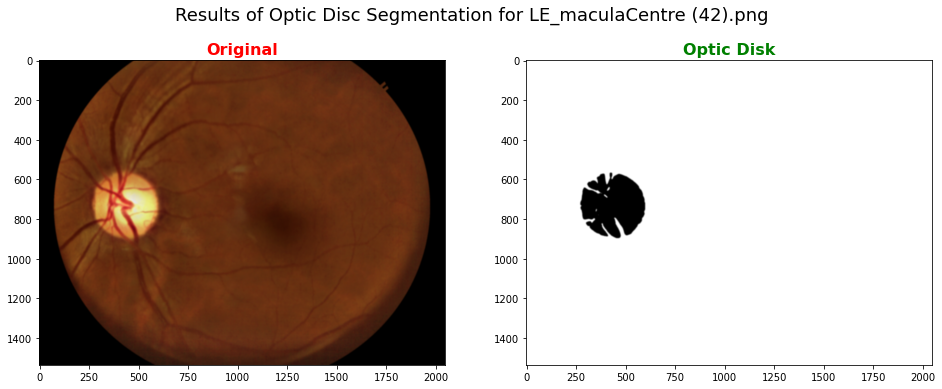

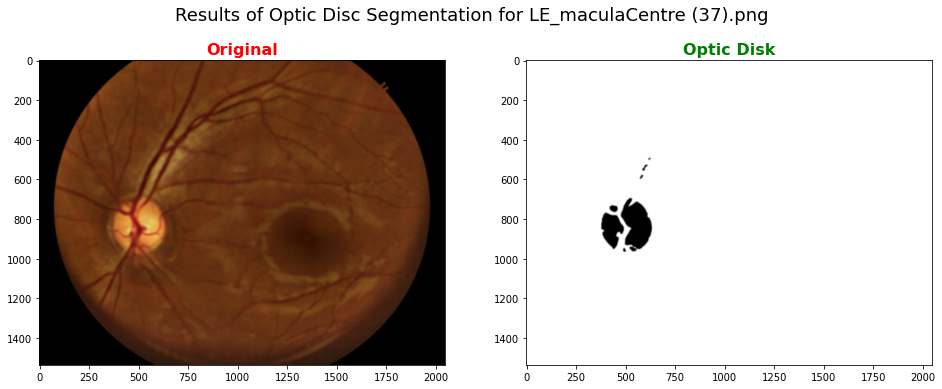

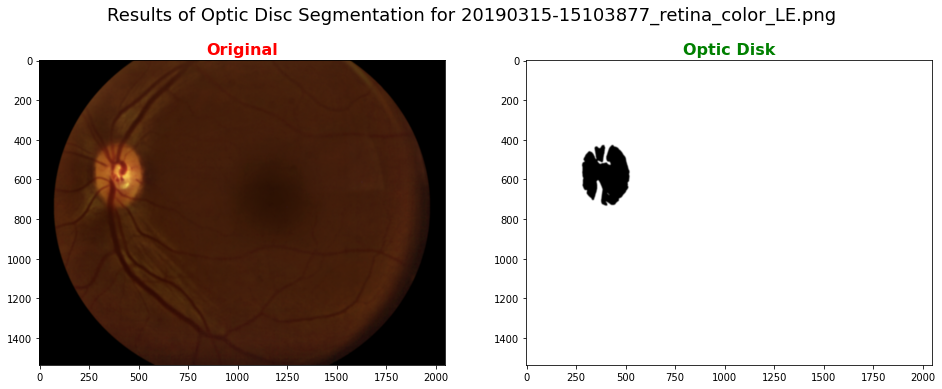

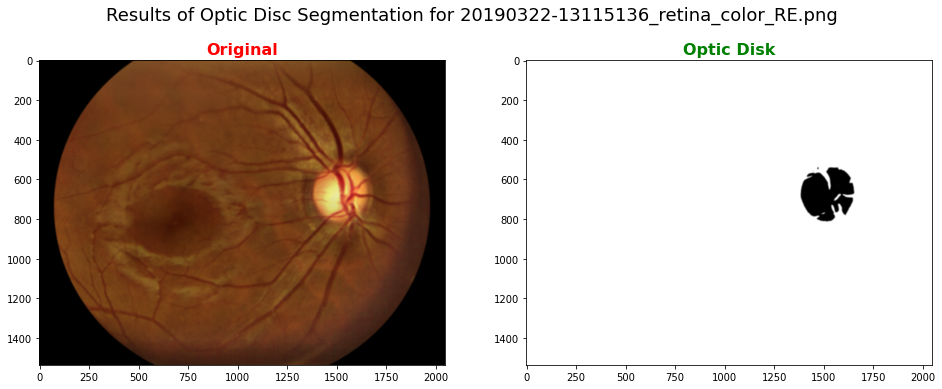

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


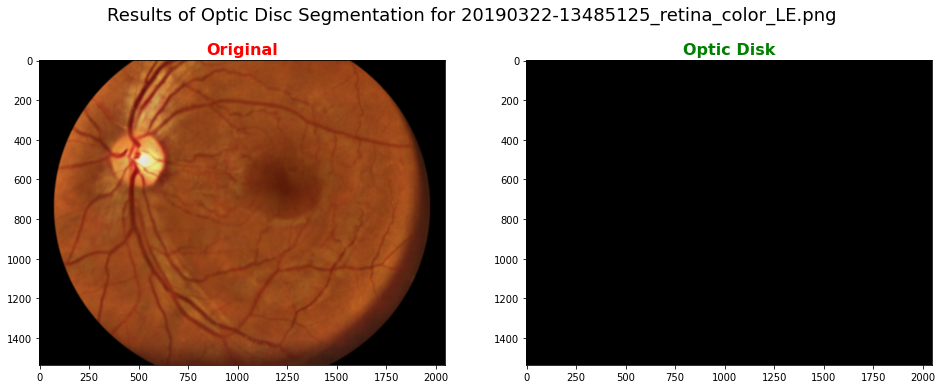

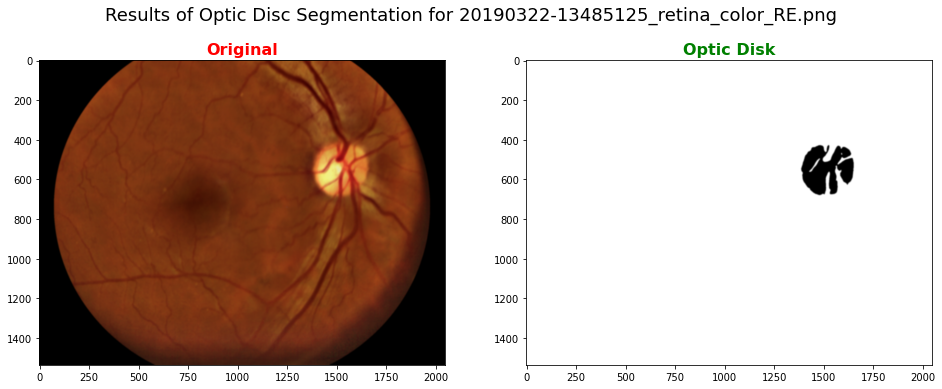

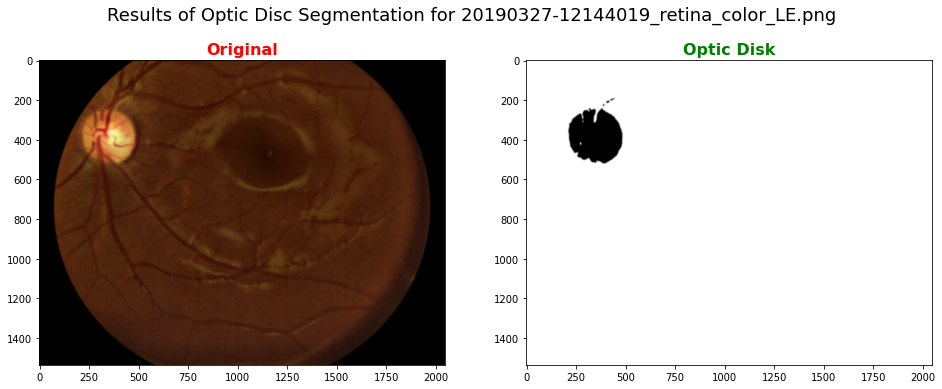

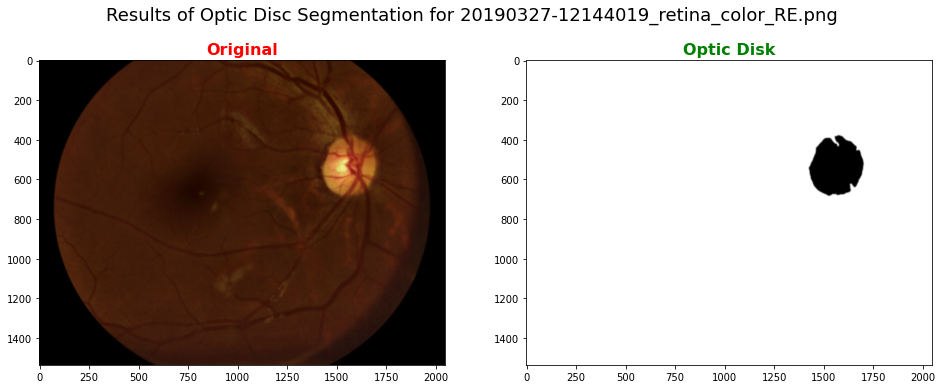

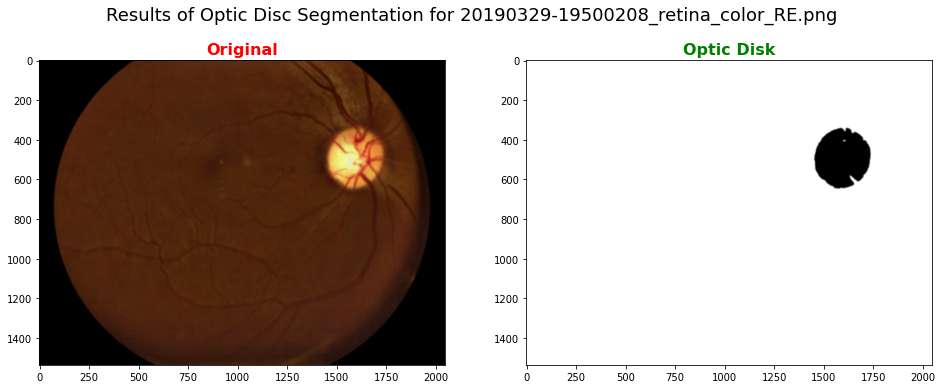

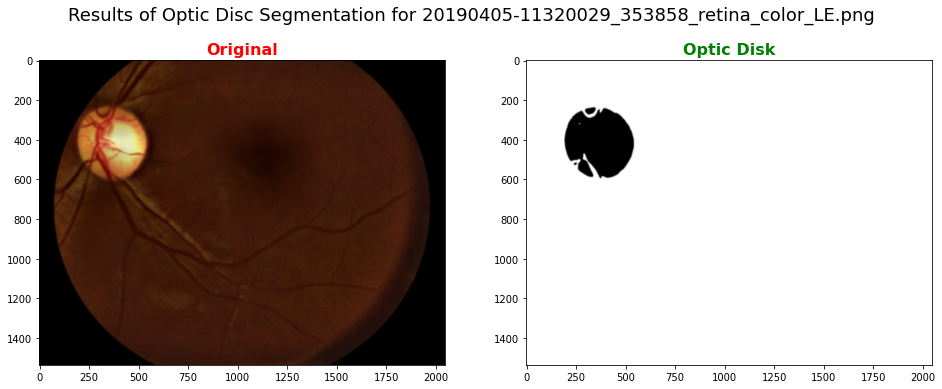

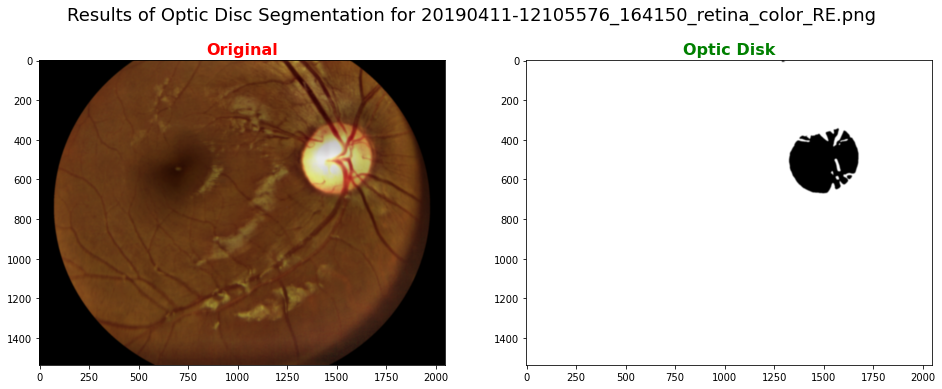

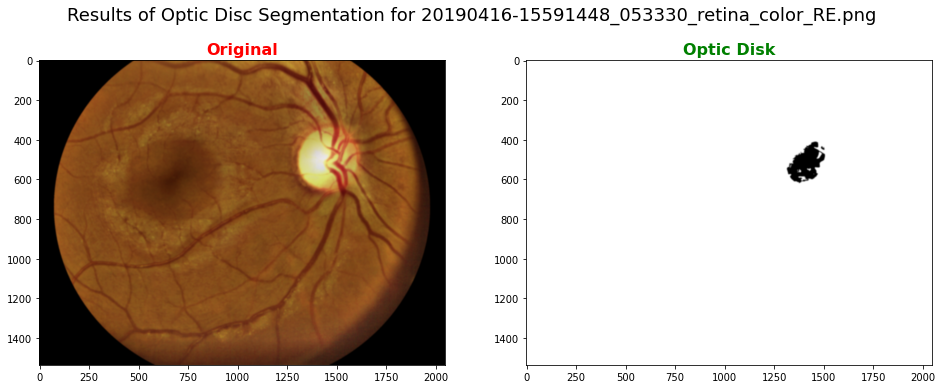

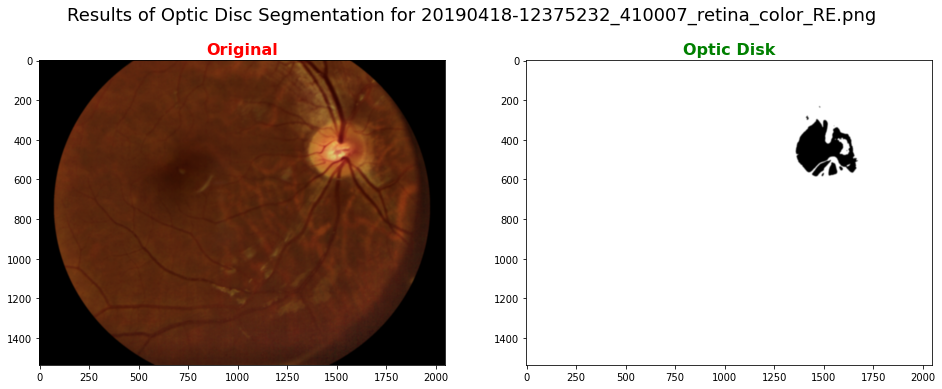

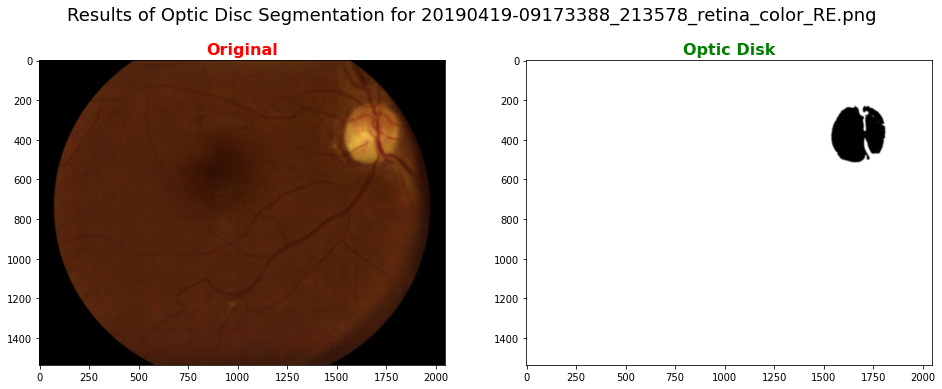

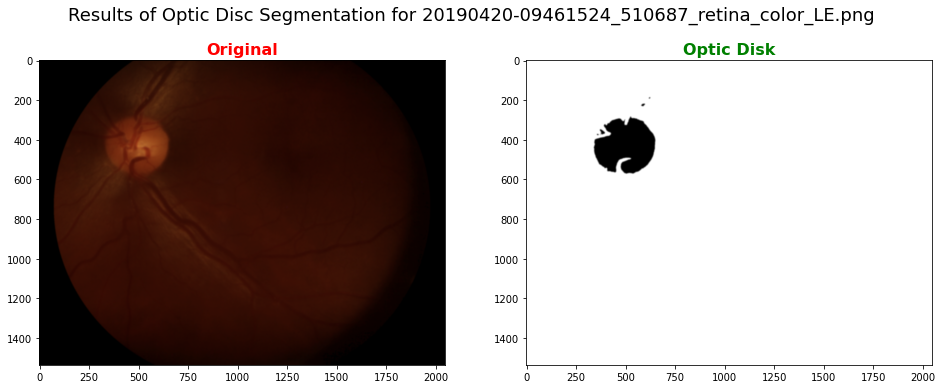

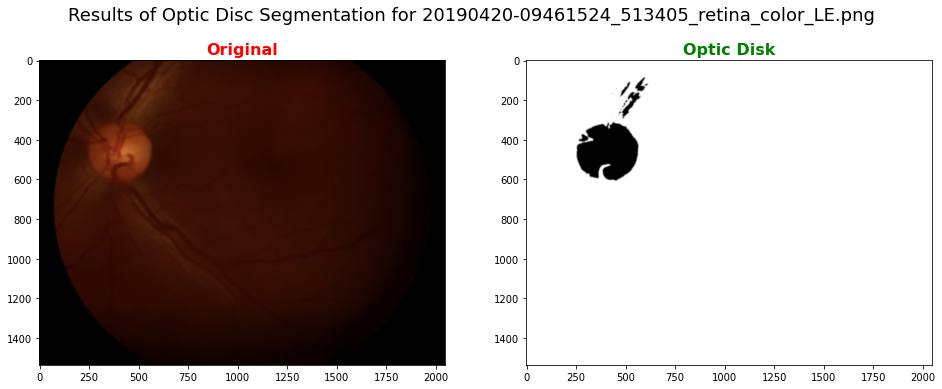

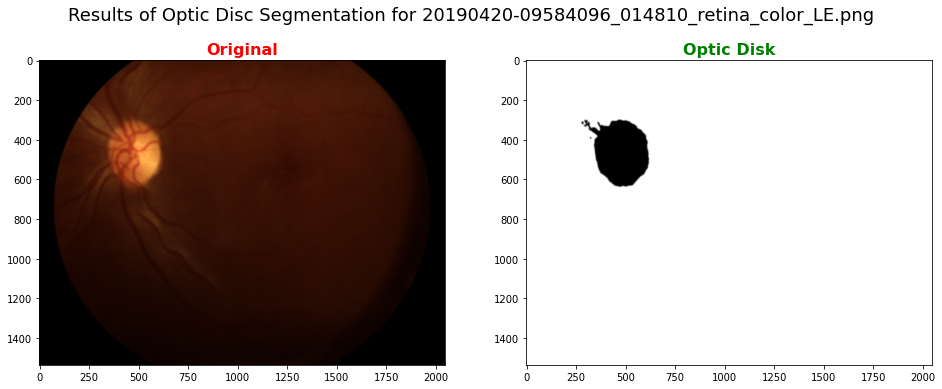

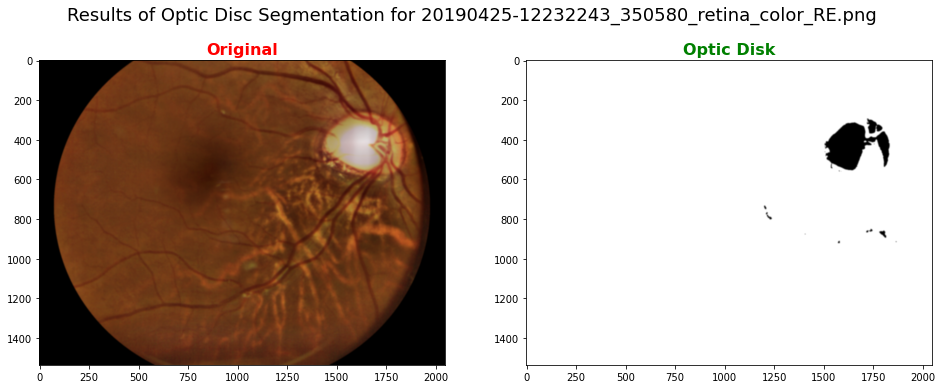

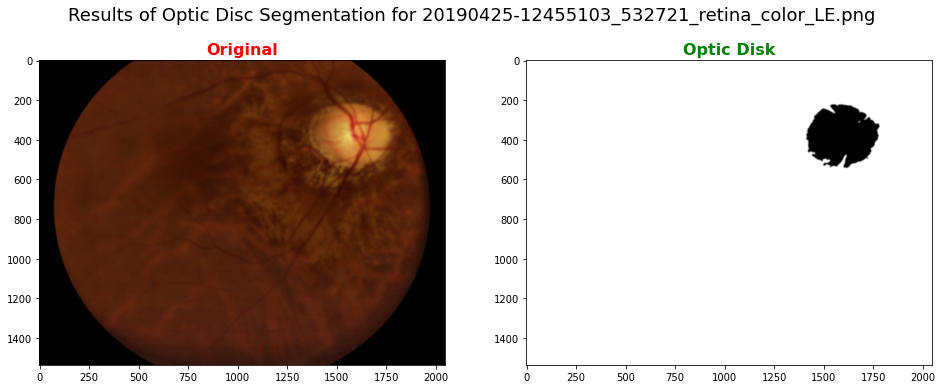

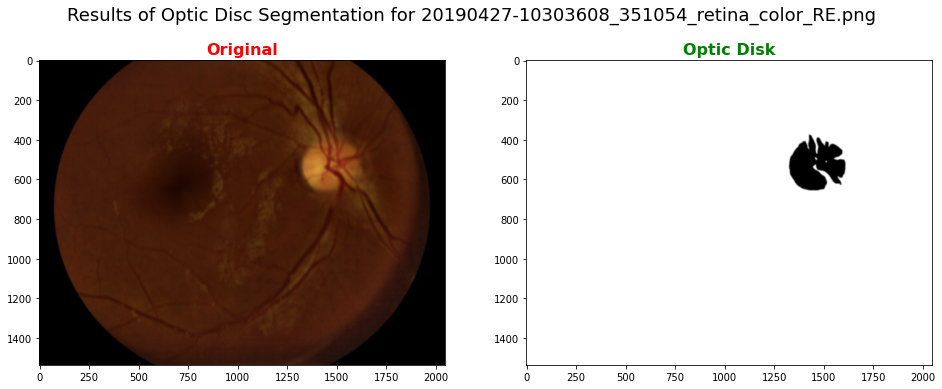

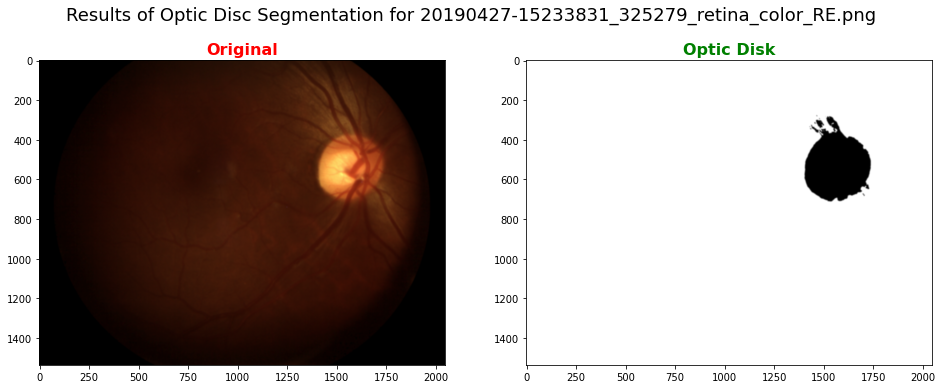

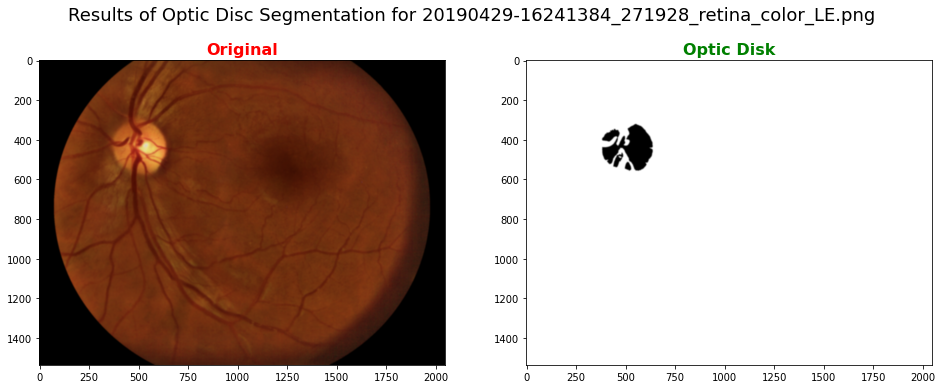

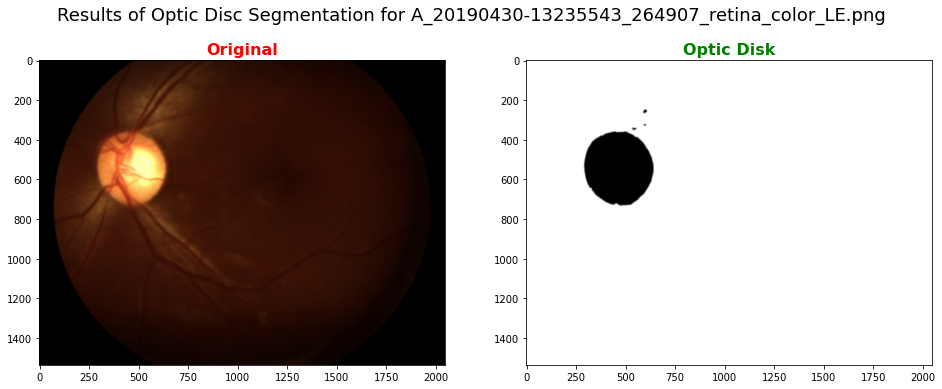

Total Time Taken to finish segmentation: 89.08929181098938


In [ ]:
import time
start = time.time()
for i in images:
  performODS(i);   
print("Total Time Taken to finish segmentation:", time.time() - start)
